# Part II

## 2.1 Task 1
Implement the CNN architecture and the training procedure by completing the files cnn model.py and cnn train.py.

## 2.2 Task 2

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Assume the CNN model is defined as `CNN`
# device: 'cuda' if using GPU, 'cpu' if using CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
def plot_graph(training_loss, training_acc, testing_loss, test_acc):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    # Plot accuracy vs. epoch
    axs[0].plot(training_loss, label='Training Loss')
    axs[0].plot(testing_loss, label='Test Loss')
    axs[0].set_title('Loss vs. Epoch')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()
    
    # Plot loss vs. epoch
    axs[1].plot(training_acc, label='Training Accuracy')
    axs[1].plot(test_acc, label='Test Accuracy')
    axs[1].set_title('Accuracy vs. Epoch')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

## Dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
from cnn_model import CNN

model = CNN(n_channels=3, n_classes=10).to(device)  # 3 channels for RGB images, 10 classes (CIFAR-10)

## Training Data
### A. Adam Optimizer

In [5]:
from cnn_train import train

train_losses, train_accuracies, test_losses, test_accuracies = train(
          model,
          train_loader,
          test_loader,
          max_epoch=100,
          learning_rate=0.01,
          optimizer_type='ADAM'
)

Epoch1/100, Train Accuracy: 0.3715, Train Loss: 1.6672, Test Accuracy: 0.5266, Test Loss: 1.3036
Epoch2/100, Train Accuracy: 0.6212, Train Loss: 1.0650, Test Accuracy: 0.6573, Test Loss: 0.9883
Epoch3/100, Train Accuracy: 0.7140, Train Loss: 0.8217, Test Accuracy: 0.7035, Test Loss: 0.8713
Epoch4/100, Train Accuracy: 0.7674, Train Loss: 0.6753, Test Accuracy: 0.7401, Test Loss: 0.7667
Epoch5/100, Train Accuracy: 0.8098, Train Loss: 0.5582, Test Accuracy: 0.7600, Test Loss: 0.7411
Epoch6/100, Train Accuracy: 0.8390, Train Loss: 0.4677, Test Accuracy: 0.7570, Test Loss: 0.7706
Epoch7/100, Train Accuracy: 0.8652, Train Loss: 0.3947, Test Accuracy: 0.7572, Test Loss: 0.8128
Epoch8/100, Train Accuracy: 0.8858, Train Loss: 0.3317, Test Accuracy: 0.7681, Test Loss: 0.7762
Epoch9/100, Train Accuracy: 0.9068, Train Loss: 0.2751, Test Accuracy: 0.7522, Test Loss: 0.9464
Epoch10/100, Train Accuracy: 0.9243, Train Loss: 0.2275, Test Accuracy: 0.7586, Test Loss: 0.9592
Epoch11/100, Train Accuracy: 

## Plot result

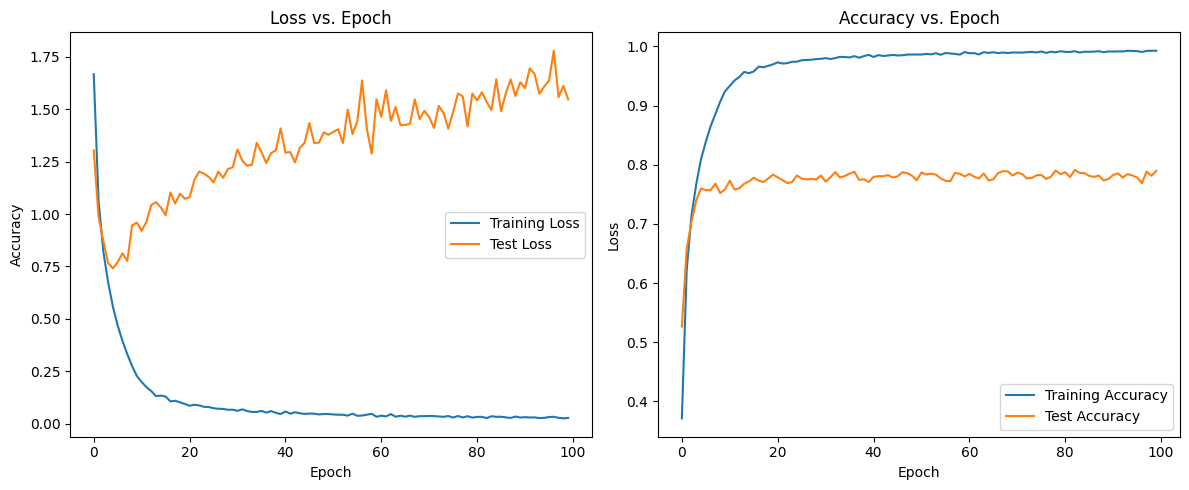

In [6]:
import numpy as np
training_accu_bl = np.array(train_accuracies)
testing_accu_bl  = np.array(test_accuracies)
training_losses_bl = np.array(train_losses)
testing_losses_bl = np.array(test_losses)

plot_graph(training_losses_bl, training_accu_bl, testing_losses_bl, testing_accu_bl)

In [7]:
### B. SGD Optimizer

In [8]:

train_losses, train_accuracies, test_losses, test_accuracies = train(
          model,
          train_loader,
          test_loader,
          max_epoch=100,
          learning_rate=0.01,
          optimizer_type='SGD'
)

Epoch1/100, Train Accuracy: 0.9948, Train Loss: 0.0186, Test Accuracy: 0.7936, Test Loss: 1.4891
Epoch2/100, Train Accuracy: 0.9961, Train Loss: 0.0138, Test Accuracy: 0.7943, Test Loss: 1.4591
Epoch3/100, Train Accuracy: 0.9962, Train Loss: 0.0121, Test Accuracy: 0.7942, Test Loss: 1.4545
Epoch4/100, Train Accuracy: 0.9966, Train Loss: 0.0118, Test Accuracy: 0.7934, Test Loss: 1.4993
Epoch5/100, Train Accuracy: 0.9967, Train Loss: 0.0114, Test Accuracy: 0.7955, Test Loss: 1.4855
Epoch6/100, Train Accuracy: 0.9966, Train Loss: 0.0118, Test Accuracy: 0.7964, Test Loss: 1.5028
Epoch7/100, Train Accuracy: 0.9969, Train Loss: 0.0106, Test Accuracy: 0.7959, Test Loss: 1.5073
Epoch8/100, Train Accuracy: 0.9966, Train Loss: 0.0110, Test Accuracy: 0.7963, Test Loss: 1.5272
Epoch9/100, Train Accuracy: 0.9974, Train Loss: 0.0094, Test Accuracy: 0.7951, Test Loss: 1.4980
Epoch10/100, Train Accuracy: 0.9971, Train Loss: 0.0097, Test Accuracy: 0.7965, Test Loss: 1.5156
Epoch11/100, Train Accuracy: 

## Plot result

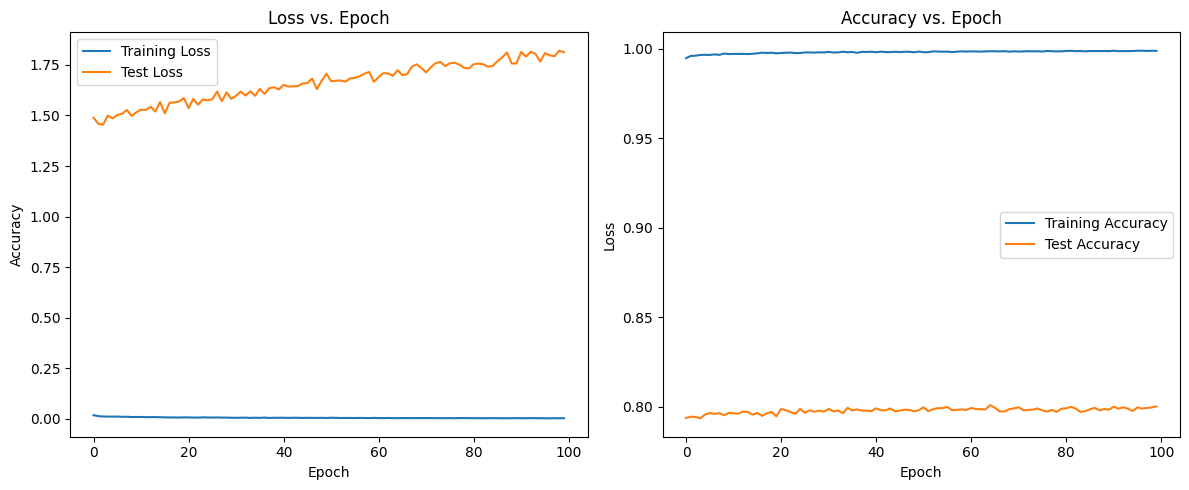

In [9]:
import numpy as np
training_accu_bl = np.array(train_accuracies)
testing_accu_bl  = np.array(test_accuracies)
training_losses_bl = np.array(train_losses)
testing_losses_bl = np.array(test_losses)

plot_graph(training_losses_bl, training_accu_bl, testing_losses_bl, testing_accu_bl)